The "Time Crop": Create a random video tensor of shape (1, 30, 3, 128, 128). Write code to extract a 10-frame sequence starting from a random frame index (e.g., if random index is 5, get frames 5-14).

In [1]:
import torch

# Shape: (Batch, Time, Channels, Height, Width)
batch_size = 1
frames = 30
channels = 3
height = 128
width = 128

video_tensor = torch.randn(
    batch_size,
    frames,
    channels,
    height,
    width
)

random_index = 5

time_crop = video_tensor[:, random_index:random_index + 10,:,:,:]

The "Grayscale" conversion: Take a random video tensor (Batch, Time, 3, H, W). Average the 3 color channels to create a grayscale video of shape (Batch, Time, 1, H, W). Hint: use torch.mean specifying the dim argument.

In [6]:
video_tensor = torch.randn(
    batch_size,
    frames,
    channels,
    height,
    width
)



print("Original shape:", video_tensor.shape)

grayscale_tensor = torch.mean(video_tensor, dim=2, keepdim=True)
print("Grayscale shape:", grayscale_tensor.shape)

Original shape: torch.Size([1, 30, 3, 128, 128])
Grayscale shape: torch.Size([1, 30, 1, 128, 128])


The "Difference" Tensor: A crude way to detect motion is to subtract the current frame from the previous frame. Create a tensor (1, 2, 3, 64, 64). Calculate frame_2 - frame_1.

torch.Size([1, 3, 64, 64])
torch.Size([3, 64, 64])


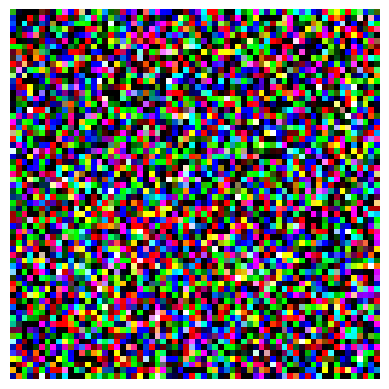

In [6]:
import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image

tf = torch.randn(1,2,3,64,64)

m = tf[:,1] - tf[:,0]

print(m.shape)

img = tf[:,1].squeeze(0)        # C,H,W in [any range]
print(img.shape)

img = img.detach().cpu().clamp(0, 1).permute(1, 2, 0).numpy()



plt.imshow(img)
plt.axis("off")
plt.show()


In [ ]:
def __getitem__(self, idx):
    video = self.videos[idx]

    chunk = video[:, 5,:15, :, :]
    return chunk
